# Iris Species Classifications  

In this project we analyse factors that are specifics to a particular Iris specy 

## Problem Statement:

Given some Iris features, we have to classify them into belonging to a class (a specific specy)

### Data Columns:

    Id	
    SepalLengthCm	
    SepalWidthCm	
    PetalLengthCm	
    PetalWidthCm	
    Species

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB

## Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# Getting info about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Finding the shape of the data
df.shape

(150, 6)

In [8]:
# Checking whether there is any missing values or not
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
print('Total Number of Unique Species: ', df.Species.nunique())
print('Unique Species: ', df.Species.unique())

Total Number of Unique Species:  3
Unique Species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Data Visualization

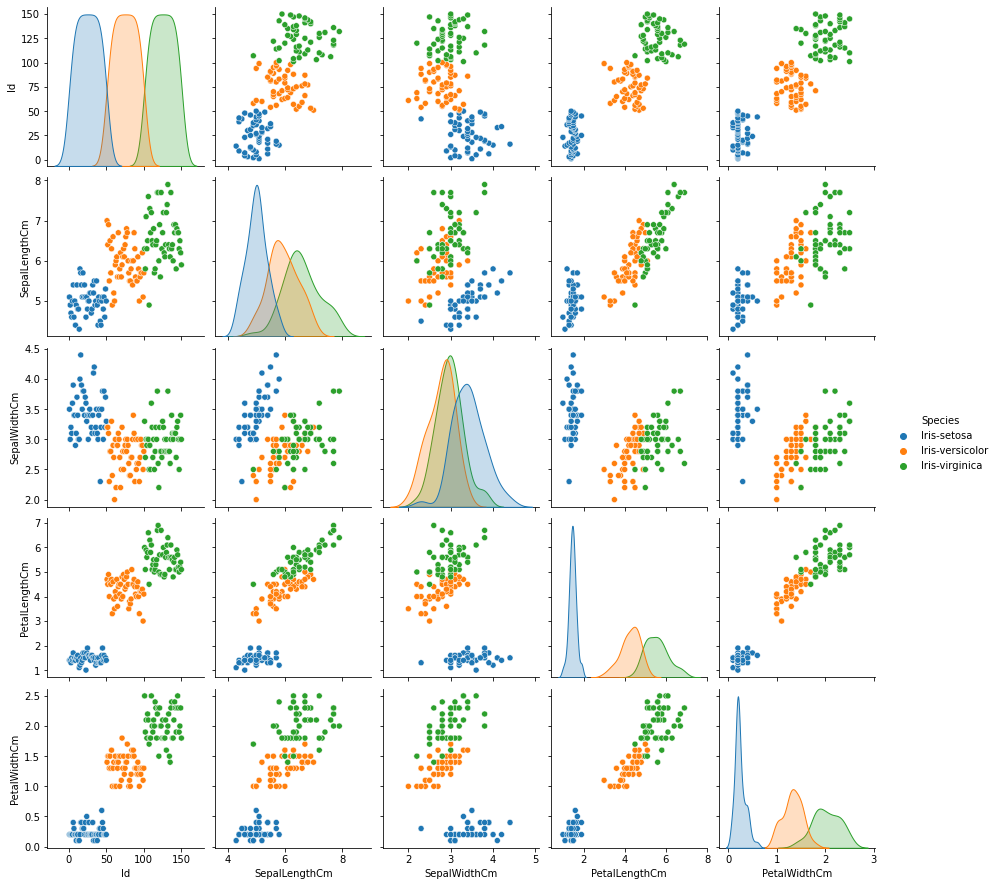

In [10]:
sns.pairplot(df, hue='Species')

Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Gropes by species')

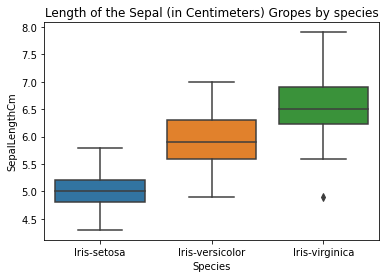

In [11]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df).set_title('Length of the Sepal (in Centimeters) Gropes by species')

Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Gropes by species')

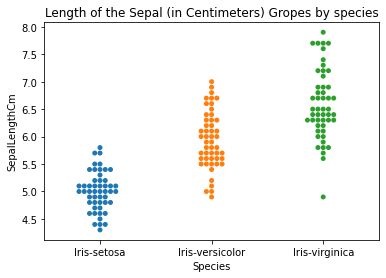

In [12]:
sns.swarmplot(x='Species', y='SepalLengthCm', data=df).set_title('Length of the Sepal (in Centimeters) Gropes by species')

Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Gropes by species')

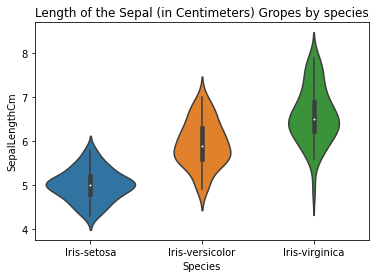

In [13]:
sns.violinplot(x='Species', y='SepalLengthCm', data=df).set_title('Length of the Sepal (in Centimeters) Gropes by species')

Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Gropes by species')

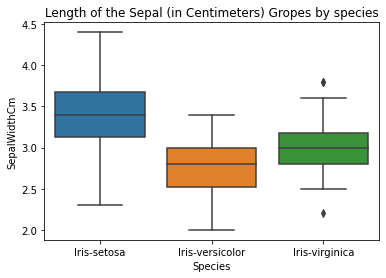

In [14]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df).set_title('Length of the Sepal (in Centimeters) Gropes by species')

Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Gropes by species')

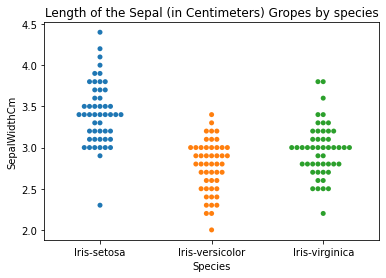

In [15]:
sns.swarmplot(x='Species', y='SepalWidthCm', data=df).set_title('Length of the Sepal (in Centimeters) Gropes by species')

Text(0.5, 1.0, 'Length of the Sepal (in Centimeters) Gropes by species')

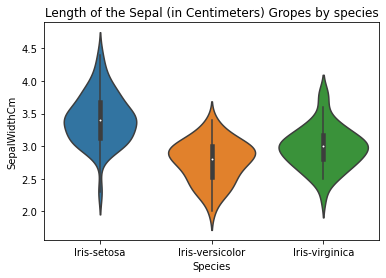

In [16]:
sns.violinplot(x='Species', y='SepalWidthCm', data=df).set_title('Length of the Sepal (in Centimeters) Gropes by species')

Text(0.5, 1.0, 'Length of the Petal (in Centimeters) Gropes by species')

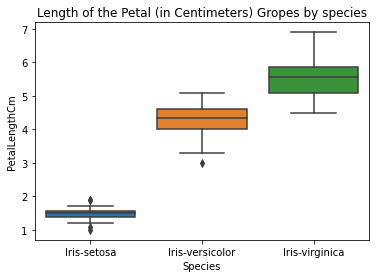

In [18]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df).set_title('Length of the Petal (in Centimeters) Gropes by species')

Text(0.5, 1.0, 'Length of the Petal (in Centimeters) Gropes by species')

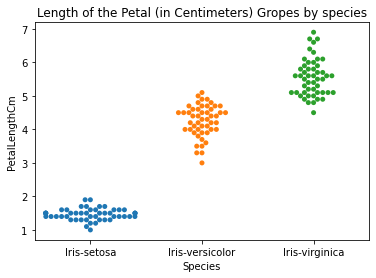

In [19]:
sns.swarmplot(x='Species', y='PetalLengthCm', data=df).set_title('Length of the Petal (in Centimeters) Gropes by species')

Text(0.5, 1.0, 'Length of the Petal (in Centimeters) Gropes by species')

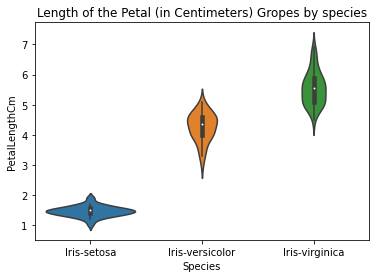

In [20]:
sns.violinplot(x='Species', y='PetalLengthCm', data=df).set_title('Length of the Petal (in Centimeters) Gropes by species')

## Feature Engineering

In [21]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [22]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

## Random Forest

In [25]:
# Creating a model
rf_model = RandomForestClassifier(max_depth=2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [27]:
# finding the training and testing accuracy
print("Training Accuracy: ",rf_model.score(X_train, y_train))
print("Testing Accuracy: ", rf_model.score(X_test, y_test))

Training Accuracy:  0.95
Testing Accuracy:  1.0


In [28]:
# printing the confusion Matrix
cm = confusion_maatrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [29]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]])

In [30]:
# when normalize is False, return the number of correctly classified samples
accuracy_score(y_test, y_pred, normalize=False)

30

In [31]:
# when normalize is True, return the % of correctly classified samples
accuracy_score(y_test, y_pred, normalize=True)

1.0

In [32]:
# when normalize is False, return the number of incorrectly classified samples
zero_one_loss(y_test, y_pred, normalize=False)

0

In [33]:
# when normalize is True, return the % of incorrectly classified samples
zero_one_loss(y_test, y_pred, normalize=True)

0.0

## Support Vector Classifier 

In [36]:
svc_clf = SVC(gamma='auto')
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)

# finding the training and testing accuracy
print("Training Accuracy: ",svc_clf.score(X_train, y_train))
print("Number of correctly classified samples: ", accuracy_score(y_test, y_pred, normalize=False), ' out of ', len(y_pred))
print('Number of suppor vectors for each class: ', svc_clf.n_support_)
print("Testing Accuracy: ", svc_clf.score(X_test, y_test))

Training Accuracy:  0.9916666666666667
Number of correctly classified samples:  30  out of  30
Number of suppor vectors for each class:  [ 6 18 19]
Testing Accuracy:  1.0


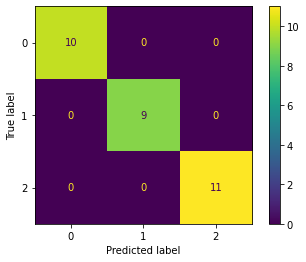

In [37]:
plot_confusion_matrix(svc_clf, X_test, y_test)